In [1]:
import sys
sys.path.insert(0, "./../../scripts")

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import ricciardi as ric
import dmft

def imshowbar(fig,ax,A,showbar=True,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    if showbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(imsh, cax=cax, orientation="vertical")
        return cbar

In [3]:
plt.rcParams["font.sans-serif"] = ["PT Sans","DejaVu Sans"]

# Plot Linear Response Statistics from Fig 4a,b

In [4]:
nori = 20

sim_dr = np.zeros(6)
sim_dstdr = np.zeros(6)
sim_rvE = np.zeros(nori)
sim_rvI = np.zeros(nori)
sim_roE = np.zeros(nori)
sim_roI = np.zeros(nori)
sim_std_rvE = np.zeros(nori)
sim_std_rvI = np.zeros(nori)
sim_std_roE = np.zeros(nori)
sim_std_roI = np.zeros(nori)

sim_μrEs = np.zeros((6,3,nori))
sim_μrIs = np.zeros((6,3,nori))
sim_ΣrEs = np.zeros((6,4,nori))
sim_ΣrIs = np.zeros((6,4,nori))

for c_idx in range(6):
    with open("./../../model_data/best_fit_1s_c_{:d}".format(c_idx)+".pkl","rb") as\
            handle:
        res_dict = pickle.load(handle)
        
    sim_dr[c_idx] = res_dict["vsm_opto_means"] - res_dict["vsm_base_means"]
    sim_dstdr[c_idx] = res_dict["vsm_opto_stds"] - res_dict["vsm_base_stds"]
        
    if c_idx == 5:
        sim_μrEs = np.mean(res_dict["μrEs"],0)
        sim_μrIs = np.mean(res_dict["μrIs"],0)
        sim_ΣrEs = np.mean(res_dict["ΣrEs"],0)
        sim_ΣrIs = np.mean(res_dict["ΣrIs"],0)
        
        sim_rvE[:] = sim_μrEs[0]
        sim_rvI[:] = sim_μrIs[0]
        sim_roE[:] = sim_μrEs[1]
        sim_roI[:] = sim_μrIs[1]
        sim_std_rvE[:] = np.sqrt(sim_ΣrEs[0])
        sim_std_rvI[:] = np.sqrt(sim_ΣrIs[0])
        sim_std_roE[:] = np.sqrt(sim_ΣrEs[1])
        sim_std_roI[:] = np.sqrt(sim_ΣrIs[1])

In [5]:
with open("./../../model_data/best_fit.pkl", "rb") as handle:
    res_dict = pickle.load(handle)
prms = res_dict["prms"]
eX = res_dict["best_monk_eX"]
bX = res_dict["best_monk_bX"]
aXs = res_dict["best_monk_aXs"]

ri = ric.Ricciardi()
ri.set_up_nonlinearity("./../../model_data/phi_int")

tau = np.array([ri.tE,ri.tI],dtype=np.float32)
W = prms["J"]*np.array([[1,-prms["gE"]],[1./prms["beta"],-prms["gI"]/prms["beta"]]],dtype=np.float32)
Ks = np.array([prms["K"],prms["K"]/4],dtype=np.float32)
H = bX*prms["K"]*prms["J"]*np.array([prms["hE"],prms["hI"]/prms["beta"]],dtype=np.float32)
eH = eX

muH = tau*H
SigH = (muH*eH)**2

muW = tau[:,None]*W*Ks
SigW = tau[:,None]**2*W**2*Ks

sW = np.array([[prms["SoriE"],prms["SoriI"]],[prms["SoriE"],prms["SoriI"]]],dtype=np.float32)
sW2 = sW**2

Loading previously saved nonlinearity


In [6]:
FE,FI,ME,MI,CE,CI = dmft.base_itp_moments("./../../model_data")
FL,ML,CL = dmft.opto_itp_moments("./../../model_data",prms["L"],prms["CVL"])
    
def base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    
def base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    
def opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def block_base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    out[2] = ME(mui[2],Sigii[2])[0]
    out[3] = MI(mui[3],Sigii[3])[0]
    
def block_base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]
    out[2] = CE(mui[2],Sigii[2],Sigij[2])[0]
    out[3] = CI(mui[3],Sigii[3],Sigij[3])[0]

def block_opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    out[2] = ML(mui[2],Sigii[2])[0]
    out[3] = MI(mui[3],Sigii[3])[0]
    
def block_opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]
    out[2] = CL(mui[2],Sigii[2],Sigij[2])[0]
    out[3] = CI(mui[3],Sigii[3],Sigij[3])[0]

In [7]:
res_dict_inits = [None]*6
res_dict_perts = [None]*6

for c_idx in range(6): 
    with open("./../../model_data/dmft_best_fit_c_{:d}".format(c_idx)+".pkl","rb") as\
            handle:
        this_res_dict = pickle.load(handle)["dmft_res"]
    if c_idx==0:
        res_dict_inits[c_idx] = {key: this_res_dict[key][:2] for key in ["r","Cr","mu","Sig"]}
        res_dict_perts[c_idx] = {key: this_res_dict[key][2:] for key in ["r","Cr","mu","Sig"]}
    else:
        res_dict_inits[c_idx] = {key: this_res_dict[key][:2] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                         "mub","mum","Sigb","Sigm",
                                                                         "drb","drm","Cdrb","Cdrm","sCdr"]}
        res_dict_perts[c_idx] = {key: this_res_dict[key][2:] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                         "mub","mum","Sigb","Sigm"]}

In [8]:
Twrm = 0.8
Tsav = 0.4
dt = 0.01/5

res_dict_decoups = [None]*6

for c_idx in range(1,6):
    # if c_idx < 5:
    #     res_dict_decoups[c_idx] = dmft.run_decoupled_two_site_dmft(prms,bX,aXs[c_idx]/bX,eX,"./../results",ri,
    #                                                             Twrm,Tsav,dt,
    #                                                             struct_dict=res_dict_inits[c_idx],
    #                                                             which="both",return_full=True)
    # else:
    #     try:
    #         res_dict_decoups[c_idx] = res_dict_decoup
    #     except:
    #         with open("./decoup_resp.pkl","rb") as handle:
    #             res_dict_decoups[c_idx] = pickle.load(handle)
            
    # with open("./../../model_data/decoup_resp_c_{:d}.pkl".format(c_idx),"wb") as handle:
    #     pickle.dump(res_dict_decoups[c_idx],handle)
        
    with open("./../../model_data/decoup_resp_c_{:d}.pkl".format(c_idx),"rb") as handle:
        res_dict_decoups[c_idx] = pickle.load(handle)

In [ ]:
def calc_lin_resp(res_dict_init,res_dict_decoup,Tsav,dt):
    δrb0 = res_dict_decoup["rb"][2:] - res_dict_init["rb"]
    δrm0 = res_dict_decoup["rm"][2:] - res_dict_init["rm"]
    δCrb0 = res_dict_decoup["Crb"][2:] - res_dict_init["Crb"]
    δCrm0 = res_dict_decoup["Crm"][2:] - res_dict_init["Crm"]
    
    sr = res_dict_init["sr"]
    sCr = res_dict_init["sCr"][:,-1]

    sWr = np.sqrt(sW2+sr**2)
    sWCr = np.sqrt(sW2+sCr**2)

    muWbb = (1 - dmft.struct_fact(180/2,sWr,sr,180)) * muW
    muWbm = dmft.struct_fact(180/2,sWr,sr,180) * muW
    muWmb = (1 - dmft.struct_fact(0,sWr,sr,180)) * muW
    muWmm = dmft.struct_fact(0,sWr,sr,180) * muW

    SigWbb = (1 - dmft.struct_fact(180/2,sWCr,sCr,180)) * SigW
    SigWbm = dmft.struct_fact(180/2,sWCr,sCr,180) * SigW
    SigWmb = (1 - dmft.struct_fact(0,sWCr,sCr,180)) * SigW
    SigWmm = dmft.struct_fact(0,sWCr,sCr,180) * SigW
    
    block_muW = np.block([
        [muWbb,muWbm],
        [muWmb,muWmm]
    ])
    block_SigW = np.block([
        [SigWbb,SigWbm],
        [SigWmb,SigWmm]
    ])

    NP = 2
    NT = int(np.round(Tsav/dt)+1)
    
    block_mu = np.concatenate([res_dict_decoup["mub"][2:],res_dict_decoup["mum"][2:]])
    block_Sig = np.concatenate([res_dict_decoup["Sigb"][2:],res_dict_decoup["Sigm"][2:]],0)
    
    res_dict_lin_resp = dmft.lin_resp_mats(np.concatenate([tau,tau]),block_muW,block_SigW,
                                        np.zeros(4),np.zeros(4),block_opto_M,block_opto_C,Tsav,dt,
                                        block_mu,block_Sig)

    A = res_dict_lin_resp["A"]
    B = res_dict_lin_resp["B"]
    C = res_dict_lin_resp["C"]
    D = res_dict_lin_resp["D"]
    
    Abb,Abm,Amb,Amm = A[:2,  :2],  A[:2,  2:],  A[2:,  :2],  A[2:,  2:]
    Bbb,Bbm,Bmb,Bmm = B[:2,  :2,:],B[:2,  2:,:],B[2:,  :2,:],B[2:,  2:,:]
    Cbb,Cbm,Cmb,Cmm = C[:2,:,:2],  C[:2,:,2:],  C[2:,:,:2],  C[2:,:,2:]
    Dbb,Dbm,Dmb,Dmm = D[:2,:,:2,:],D[:2,:,2:,:],D[2:,:,:2,:],D[2:,:,2:,:]
    
    Mbb = np.block([[Abb,Bbb.reshape(NP,NP*NT)],[Cbb.reshape(NP*NT,NP),Dbb.reshape(NP*NT,NP*NT)]])
    Mbm = np.block([[Abm,Bbm.reshape(NP,NP*NT)],[Cbm.reshape(NP*NT,NP),Dbm.reshape(NP*NT,NP*NT)]])
    Mmb = np.block([[Amb,Bmb.reshape(NP,NP*NT)],[Cmb.reshape(NP*NT,NP),Dmb.reshape(NP*NT,NP*NT)]])
    Mmm = np.block([[Amm,Bmm.reshape(NP,NP*NT)],[Cmm.reshape(NP*NT,NP),Dmm.reshape(NP*NT,NP*NT)]])
    
    Xbm = -np.linalg.solve(Mbb,Mbm)
    Xmb = -np.linalg.solve(Mmm,Mmb)
    
    Xbm_mint = Xbm.copy()
    Xbm_mint[:,2:] = 0
    Xmb_mint = Xmb.copy()
    Xmb_mint[:,2:] = 0

    δmb0 = np.concatenate([δrb0,δCrb0.flatten()])
    δmp0 = np.concatenate([δrm0,δCrm0.flatten()])

    fb = Mbb@δmb0
    fp = Mmm@δmp0

    M = np.block([[Mbb,Mbm],[Mmb,Mmm]])
    f = np.concatenate([fb,fp])
    
    δm = np.concatenate([δmb0,
                         δmp0+Xmb@δmb0])
    δm_mint = np.concatenate([δmb0,
                             δmp0+Xmb_mint@δmb0])

    δmb = δm[:NP+NP*NT]
    δmp = δm[NP+NP*NT:]

    δmb_mint = δm_mint[:NP+NP*NT]
    δmp_mint = δm_mint[NP+NP*NT:]

    δrb = δmb[:NP]
    δCrb = δmb[NP:].reshape(NP,NT)
    δrm = δmp[:NP]
    δCrm = δmp[NP:].reshape(NP,NT)

    δrb_mint = δmb_mint[:NP]
    δCrb_mint = δmb_mint[NP:].reshape(NP,NT)
    δrm_mint = δmp_mint[:NP]
    δCrm_mint = δmp_mint[NP:].reshape(NP,NT)
    
    res_dict = {}
    
    res_dict["drb0"] = δrb0
    res_dict["drm0"] = δrm0
    res_dict["dCrb0"] = δCrb0
    res_dict["dCrm0"] = δCrm0
    res_dict["drb"] = δrb
    res_dict["drm"] = δrm
    res_dict["dCrb"] = δCrb
    res_dict["dCrm"] = δCrm
    res_dict["drb_mint"] = δrb_mint
    res_dict["drm_mint"] = δrm_mint
    res_dict["dCrb_mint"] = δCrb_mint
    res_dict["dCrm_mint"] = δCrm_mint
    
    return res_dict

In [10]:
res_dict_lin_resps = [None]*6

for c_idx in range(1,6):
    res_dict_lin_resps[c_idx] = calc_lin_resp(res_dict_inits[c_idx],res_dict_decoups[c_idx],Tsav,dt)

In [11]:
dmft_dr = np.zeros(6)
dmft_dr0 = np.zeros(6)
dmft_drfull = np.zeros(6)
dmft_dr_mint = np.zeros(6)
dmft_dstdr = np.zeros(6)
dmft_dstdr0 = np.zeros(6)
dmft_dstdrfull = np.zeros(6)
dmft_dstdr_mint = np.zeros(6)
dmft_stddr = np.zeros(6)
dmft_stddr0 = np.zeros(6)

for c_idx in range(6):
    if c_idx==0:
        dmft_dr[c_idx] = np.sum(np.array([0.8,0.2])*(res_dict_perts[c_idx]["r"] - res_dict_inits[c_idx]["r"]))
        dmft_dr0[c_idx] = np.nan
        dmft_drfull[c_idx] = np.nan
        dmft_dr_mint[c_idx] = np.nan
        
        dmft_dstdr[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_perts[c_idx]["Cr"],1,dt)-res_dict_perts[c_idx]["r"]**2))) -\
            np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Cr"],1,dt)-res_dict_inits[c_idx]["r"]**2)))
        dmft_dstdr0[c_idx] = np.nan
        dmft_dstdrfull[c_idx] = np.nan
        dmft_dstdr_mint[c_idx] = np.nan
        dmft_stddr[c_idx] = np.nan
        dmft_stddr0[c_idx] = np.nan
    else:
        dmft_dr[c_idx] = np.sum(np.array([0.8,0.2])*(res_dict_perts[c_idx]["rm"] - res_dict_inits[c_idx]["rm"]))
        dmft_dr0[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm0"])
        dmft_drfull[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm"])
        dmft_dr_mint[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm_mint"])
        dmft_drfull[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm"])
        dmft_dr_mint[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm_mint"])
        
        init_varr = np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Crm"],1,dt)-res_dict_inits[c_idx]["rm"]**2))
        dmft_dstdr[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_perts[c_idx]["Crm"],1,dt)-res_dict_perts[c_idx]["rm"]**2))) -\
            np.sqrt(init_varr)
        dmft_dstdr0[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_decoups[c_idx]["Crm"][2:],1,dt)-res_dict_decoups[c_idx]["rm"][2:]**2))) -\
            np.sqrt(init_varr)
        dmft_dstdrfull[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Crm"]+res_dict_lin_resps[c_idx]["dCrm"],1,dt)-\
            (res_dict_inits[c_idx]["rm"]+res_dict_lin_resps[c_idx]["drm"])**2))) -\
            np.sqrt(init_varr)
        dmft_dstdr_mint[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Crm"]+res_dict_lin_resps[c_idx]["dCrm_mint"],1,dt)-\
            (res_dict_inits[c_idx]["rm"]+res_dict_lin_resps[c_idx]["drm_mint"])**2))) -\
            np.sqrt(init_varr)
        dmft_stddr[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Cdrm"],1,dt)-\
            (res_dict_perts[c_idx]["rm"] - res_dict_inits[c_idx]["rm"])**2)))
        dmft_stddr0[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_decoups[c_idx]["Cdrm"],1,dt)-res_dict_decoups[c_idx]["drm"]**2)))

In [12]:
oris = np.arange(nori//2+1) * 90/(nori/2)
def gauss(x,b,p,s):
    return b + (p-b)*dmft.basesubwrapnorm(x,s)

sr = res_dict_inits[5]["sr"]
rvb = res_dict_inits[5]["rb"]
rvp = res_dict_inits[5]["rm"]
rob = res_dict_perts[5]["rb"]
rop = res_dict_perts[5]["rm"]

sCr = res_dict_inits[5]["sCr"][:,-1]
Crvb = dmft.grid_stat(np.mean,res_dict_inits[5]["Crb"],1,dt)
Crvp = dmft.grid_stat(np.mean,res_dict_inits[5]["Crm"],1,dt)
Crob = dmft.grid_stat(np.mean,res_dict_perts[5]["Crb"],1,dt)
Crop = dmft.grid_stat(np.mean,res_dict_perts[5]["Crm"],1,dt)

drb = res_dict_lin_resps[5]["drb"]
drm = res_dict_lin_resps[5]["drm"]
drb0 = res_dict_lin_resps[5]["drb0"]
drm0 = res_dict_lin_resps[5]["drm0"]
drb_mint = res_dict_lin_resps[5]["drb_mint"]
drm_mint = res_dict_lin_resps[5]["drm_mint"]
dCrb = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrb"],1,dt)
dCrm = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrm"],1,dt)
dCrb0 = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrb0"],1,dt)
dCrm0 = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrm0"],1,dt)
dCrb_mint = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrb_mint"],1,dt)
dCrm_mint = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrm_mint"],1,dt)

rvE = gauss(oris,rvb[0],rvp[0],sr[0])
rvI = gauss(oris,rvb[1],rvp[1],sr[1])
roE = gauss(oris,rob[0],rop[0],sr[0])
roI = gauss(oris,rob[1],rop[1],sr[1])

CrvE = gauss(oris,Crvb[0],Crvp[0],sCr[0])
CrvI = gauss(oris,Crvb[1],Crvp[1],sCr[1])
CroE = gauss(oris,Crob[0],Crop[0],sCr[0])
CroI = gauss(oris,Crob[1],Crop[1],sCr[1])

drE = gauss(oris,drb[0],drm[0],sr[0])
drI = gauss(oris,drb[1],drm[1],sr[1])
drE0 = gauss(oris,drb0[0],drm0[0],sr[0])
drI0 = gauss(oris,drb0[1],drm0[1],sr[1])
drE_mint = gauss(oris,drb_mint[0],drm_mint[0],sr[0])
drI_mint = gauss(oris,drb_mint[1],drm_mint[1],sr[1])

dCrE = gauss(oris,dCrb[0],dCrm[0],sCr[0])
dCrI = gauss(oris,dCrb[1],dCrm[1],sCr[1])
dCrE0 = gauss(oris,dCrb0[0],dCrm0[0],sCr[0])
dCrI0 = gauss(oris,dCrb0[1],dCrm0[1],sCr[1])
dCrE_mint = gauss(oris,dCrb_mint[0],dCrm_mint[0],sCr[0])
dCrI_mint = gauss(oris,dCrb_mint[1],dCrm_mint[1],sCr[1])

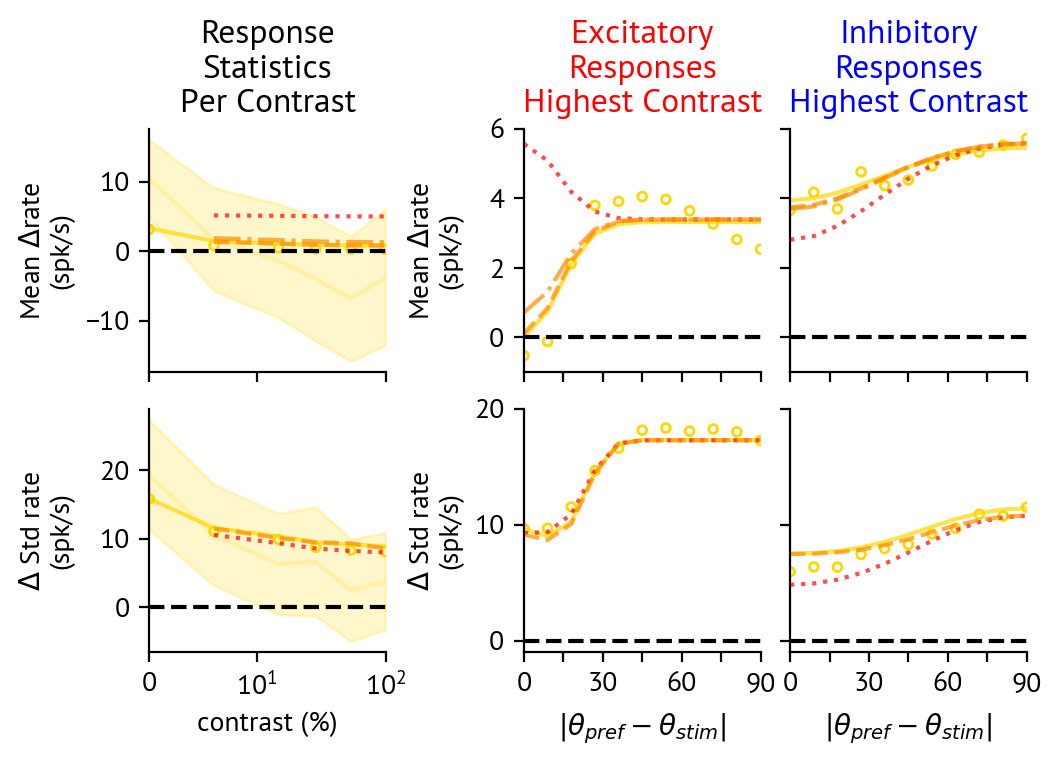

In [13]:
with open("./../../experimental_data/data_moments"+".pkl", "rb") as handle:
    data_preds = np.transpose(pickle.load(handle)[1],(1,0,2))
data_dr = np.concatenate([data_preds[:,1,0:1]-data_preds[:,0,0:1],
                          np.sqrt(data_preds[:,1,1:2]**2+data_preds[:,0,1:2]**2)],-1)
data_dstdr = np.concatenate([data_preds[:,3,0:1]-data_preds[:,2,0:1],
                             np.sqrt(data_preds[:,3,1:2]**2+data_preds[:,2,1:2]**2)],-1)
with open("./../../experimental_data/data_contrasts"+".pkl", "rb") as handle:
    cons = pickle.load(handle)[1]

def abs_ori(A):
    return 0.5*(A[:nori//2+1] + np.concatenate((A[0:1],A[-1:nori//2-1:-1])))

fig,axs = plt.subplots(2,4,figsize=(1.7*3.33,1.7*2),dpi=200,sharex="col",width_ratios=(3,1,3,3))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
for i in range(2):
    axs[i,1].set_axis_off()
    axs[i,2].yaxis.set_tick_params(which="both",labelleft=True)
    axs[i,3].yaxis.set_tick_params(which="both",labelleft=False)
axs = axs[:,[0,2,3]]

axs[0,0].plot(cons,data_dr[:,0],color="gold",alpha=0.2)
axs[0,0].fill_between(cons,data_dr[:,0]-data_dr[:,1],data_dr[:,0]+data_dr[:,1],color="gold",alpha=0.2)
axs[0,0].scatter(cons,sim_dr,edgecolors="gold",facecolors="none",marker="o",s=10)
axs[0,0].plot(cons,dmft_dr,c="gold",ls="-",alpha=0.7,label="a")
axs[0,0].plot(cons,dmft_dr0,c="red",ls=":",alpha=0.7,label="a")
axs[0,0].plot(cons,dmft_drfull,c="darkorange",ls="--",alpha=0.7,label="a")
axs[0,0].plot(cons,dmft_dr_mint,c="darkorange",ls="-.",alpha=0.7,label="a")
axs[0,1].plot(oris,roE-rvE,c="gold",ls="-",alpha=0.7,label="a")
axs[0,1].plot(oris,drE0,c="red",ls=":",alpha=0.7,label="a")
axs[0,1].plot(oris,drE,c="darkorange",ls="--",alpha=0.7,label="a")
axs[0,1].plot(oris,drE_mint,c="darkorange",ls="-.",alpha=0.7,label="a")
axs[0,1].scatter(oris,abs_ori(sim_roE-sim_rvE),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[0,2].plot(oris,roI-rvI,c="gold",ls="-",alpha=0.7)
axs[0,2].plot(oris,drI0,c="red",ls=":",alpha=0.7)
axs[0,2].plot(oris,drI,c="darkorange",ls="--",alpha=0.7)
axs[0,2].plot(oris,drI_mint,c="darkorange",ls="-.",alpha=0.7)
axs[0,2].scatter(oris,abs_ori(sim_roI-sim_rvI),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[1,0].plot(cons,data_dstdr[:,0],color="gold",alpha=0.2)
axs[1,0].fill_between(cons,data_dstdr[:,0]-data_dstdr[:,1],data_dstdr[:,0]+data_dstdr[:,1],color="gold",alpha=0.2)
axs[1,0].scatter(cons,sim_dstdr,edgecolors="gold",facecolors="none",marker="o",s=10)
axs[1,0].plot(cons,dmft_dstdr,c="gold",ls="-",alpha=0.7,label="a")
axs[1,0].plot(cons,dmft_dstdr0,c="red",ls=":",alpha=0.7,label="a")
axs[1,0].plot(cons,dmft_dstdrfull,c="darkorange",ls="--",alpha=0.7,label="a")
# axs[1,0].plot(cons,dmft_dstdr_mint,c="darkorange",ls="-.",alpha=0.7,label="a")
axs[1,1].plot(oris,np.sqrt(CroE-roE**2)-np.sqrt(CrvE-rvE**2),c="gold",ls="-",alpha=0.7)
axs[1,1].plot(oris,np.sqrt(CrvE+dCrE0-(rvE+drE0)**2)-np.sqrt(CrvE-rvE**2),c="red",ls=":",alpha=0.7)
axs[1,1].plot(oris,np.sqrt(CrvE+dCrE-(rvE+drE)**2)-np.sqrt(CrvE-rvE**2),c="darkorange",ls="--",alpha=0.7)
# axs[1,1].plot(oris,np.sqrt(CrvE+dCrE_mint-(rvE+drE_mint)**2)-np.sqrt(CrvE-rvE**2),c="darkorange",ls="-.",alpha=0.7)
axs[1,1].scatter(oris,abs_ori(sim_std_roE-sim_std_rvE),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[1,2].plot(oris,np.sqrt(CroI-roI**2)-np.sqrt(CrvI-rvI**2),c="gold",ls="-",alpha=0.7)
axs[1,2].plot(oris,np.sqrt(CrvI+dCrI0-(rvI+drI0)**2)-np.sqrt(CrvI-rvI**2),c="red",ls=":",alpha=0.7)
axs[1,2].plot(oris,np.sqrt(CrvI+dCrI-(rvI+drI)**2)-np.sqrt(CrvI-rvI**2),c="darkorange",ls="--",alpha=0.7)
# axs[1,2].plot(oris,np.sqrt(CrvI+dCrI_mint-(rvI+drI_mint)**2)-np.sqrt(CrvI-rvI**2),c="darkorange",ls="-.",alpha=0.7)
axs[1,2].scatter(oris,abs_ori(sim_std_roI-sim_std_rvI),edgecolors="gold",facecolors="none",marker="o",s=10)

for i in range(2):
    for j in range(3):
        axs[i,j].axhline(0,c="k",ls="--")

for ax in axs.flat:
    ax.spines[["right", "top"]].set_visible(False)

axs[0,0].set_xscale("symlog", linthresh=12)
nticks = 7
ticks = np.array(["{:.0f}".format(ori) for ori in np.linspace(0,90,nticks)])
ticks[1::2] = ""
for i in range(1,3):
    axs[1,i].set_xticks(np.linspace(0,90,7),ticks)

axs[0,0].set_xlim(0,100)
axs[0,1].set_xlim(0,90)
axs[0,2].set_xlim(0,90)
for i in range(1,3):
    axs[0,i].set_ylim(-1,6)
    axs[1,i].set_ylim(-1,20)

axs[1,0].set_xlabel("contrast (%)")
axs[1,1].set_xlabel(r"$|\theta_{pref}-\theta_{stim}|$")
axs[1,2].set_xlabel(r"$|\theta_{pref}-\theta_{stim}|$")

for i in range(2):
    axs[0,i].set_ylabel(r"Mean $\Delta$rate"+"\n(spk/s)")
    axs[1,i].set_ylabel(r"$\Delta$ Std rate"+"\n(spk/s)")

axs[0,0].set_title("Response\nStatistics\nPer Contrast",color="k")
axs[0,1].set_title("Excitatory\nResponses\nHighest Contrast",color="r")
axs[0,2].set_title("Inhibitory\nResponses\nHighest Contrast",color="b")

fig.align_labels()

# fig.tight_layout()
fig.savefig("./fig_4ab.pdf")

# Plot Linear Response Statistics with Varied Structure and Coupling from Fig 4c

In [ ]:
res_dict_inits = [[None for i in range(7)] for j in range(7)]
res_dict_perts = [[None for i in range(7)] for j in range(7)]

for s_idx in range(7):
    for j_idx in range(7):
        with open("./../../model_data/dmft_vary_ffwidth_{:d}_J_{:d}".format(s_idx,j_idx)+".pkl","rb") as\
                handle:
            this_res_dict = pickle.load(handle)["dmft_res"]
        res_dict_inits[s_idx][j_idx] = {key: this_res_dict[key][:2] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                                "mub","mum","Sigb","Sigm"]}
        res_dict_perts[s_idx][j_idx] = {key: this_res_dict[key][2:] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                                "mub","mum","Sigb","Sigm"]}

In [15]:
Twrm = 1.2
Tsav = 0.4

widths = 4**(2*np.arange(0,6+1)/6 - 1)
Js = prms["J"]*8**(2*np.arange(0,6+1)/6 - 2/3)
res_dict_decoups = [[None for i in range(7)] for j in range(7)]

for s_idx in range(7):
    width = widths[s_idx]
    for j_idx in range(7):
        # newJ = Js[j_idx]
        
        # this_prms = prms.copy()
        # this_prms["J"] = newJ
        # this_prms["SoriF"] *= width
        # this_prms["baseinp"] = dmft.wrapnormdens(90,this_prms["SoriF"]) / dmft.wrapnormdens(0,this_prms["SoriF"])
        
        # if j_idx < 3:
        #     dt = 0.01/5
        # elif j_idx < 5:
        #     dt = 0.01/8
        # else:
        #     dt = 0.01/10
        # res_dict_decoups[s_idx][j_idx] = dmft.run_decoupled_two_site_dmft(this_prms,bX,aXs[-1]/bX,eX,"./../results",
        #                                                                   ri,Twrm,Tsav,dt,
        #                                                                   struct_dict=res_dict_inits[s_idx][j_idx],
        #                                                                   which="opto",return_full=True)
        # with open("./../../model_data/decoup_resp_s_{:d}_j_{:d}.pkl".format(s_idx,j_idx),"wb") as handle:
        #     pickle.dump(res_dict_decoups[s_idx][j_idx],handle)
        
        # print("Done with s={:d}, j={:d}".format(s_idx,j_idx))
            
        with open("./../../model_data/decoup_resp_s_{:d}_j_{:d}.pkl".format(s_idx,j_idx),"rb") as handle:
            res_dict_decoups[s_idx][j_idx] = pickle.load(handle)

In [ ]:
def calc_lin_resp(res_dict_init,res_dict_decoup,prms,Tsav,dt):
    tau = np.array([ri.tE,ri.tI],dtype=np.float32)
    W = prms["J"]*np.array([[1,-prms["gE"]],
                                 [1./prms["beta"],-prms["gI"]/prms["beta"]]],dtype=np.float32)
    Ks = np.array([prms["K"],prms["K"]/4],dtype=np.float32)

    muW = tau[:,None]*W*Ks
    SigW = tau[:,None]**2*W**2*Ks
    
    δrb0 = res_dict_decoup["rb"] - res_dict_init["rb"]
    δrm0 = res_dict_decoup["rm"] - res_dict_init["rm"]
    δCrb0 = res_dict_decoup["Crb"] - res_dict_init["Crb"]
    δCrm0 = res_dict_decoup["Crm"] - res_dict_init["Crm"]
    
    sr = res_dict_init["sr"]
    sCr = res_dict_init["sCr"][:,-1]

    sW = np.array([[prms["SoriE"],prms["SoriI"]],
                   [prms["SoriE"],prms["SoriI"]]],dtype=np.float32)
    sW2 = sW**2
    sWr = np.sqrt(sW2+sr**2)
    sWCr = np.sqrt(sW2+sCr**2)

    muWbb = (1 - dmft.struct_fact(180/2,sWr,sr,180)) * muW
    muWbm = dmft.struct_fact(180/2,sWr,sr,180) * muW
    muWmb = (1 - dmft.struct_fact(0,sWr,sr,180)) * muW
    muWmm = dmft.struct_fact(0,sWr,sr,180) * muW

    SigWbb = (1 - dmft.struct_fact(180/2,sWCr,sCr,180)) * SigW
    SigWbm = dmft.struct_fact(180/2,sWCr,sCr,180) * SigW
    SigWmb = (1 - dmft.struct_fact(0,sWCr,sCr,180)) * SigW
    SigWmm = dmft.struct_fact(0,sWCr,sCr,180) * SigW
    
    block_muW = np.block([
        [muWbb,muWbm],
        [muWmb,muWmm]
    ])
    block_SigW = np.block([
        [SigWbb,SigWbm],
        [SigWmb,SigWmm]
    ])

    NP = 2
    NT = int(np.round(Tsav/dt)+1)
    
    block_mu = np.concatenate([res_dict_decoup["mub"],res_dict_decoup["mum"]])
    block_Sig = np.concatenate([res_dict_decoup["Sigb"],res_dict_decoup["Sigm"]],0)
    
    res_dict_lin_resp = dmft.lin_resp_mats(np.concatenate([tau,tau]),block_muW,block_SigW,
                                        np.zeros(4),np.zeros(4),block_opto_M,block_opto_C,Tsav,dt,
                                        block_mu,block_Sig)

    A = res_dict_lin_resp["A"]
    B = res_dict_lin_resp["B"]
    C = res_dict_lin_resp["C"]
    D = res_dict_lin_resp["D"]
    
    Abb,Abm,Amb,Amm = A[:2,  :2],  A[:2,  2:],  A[2:,  :2],  A[2:,  2:]
    Bbb,Bbm,Bmb,Bmm = B[:2,  :2,:],B[:2,  2:,:],B[2:,  :2,:],B[2:,  2:,:]
    Cbb,Cbm,Cmb,Cmm = C[:2,:,:2],  C[:2,:,2:],  C[2:,:,:2],  C[2:,:,2:]
    Dbb,Dbm,Dmb,Dmm = D[:2,:,:2,:],D[:2,:,2:,:],D[2:,:,:2,:],D[2:,:,2:,:]
    
    Mbb = np.block([[Abb,Bbb.reshape(NP,NP*NT)],[Cbb.reshape(NP*NT,NP),Dbb.reshape(NP*NT,NP*NT)]])
    Mbm = np.block([[Abm,Bbm.reshape(NP,NP*NT)],[Cbm.reshape(NP*NT,NP),Dbm.reshape(NP*NT,NP*NT)]])
    Mmb = np.block([[Amb,Bmb.reshape(NP,NP*NT)],[Cmb.reshape(NP*NT,NP),Dmb.reshape(NP*NT,NP*NT)]])
    Mmm = np.block([[Amm,Bmm.reshape(NP,NP*NT)],[Cmm.reshape(NP*NT,NP),Dmm.reshape(NP*NT,NP*NT)]])
    
    Xbm = -np.linalg.solve(Mbb,Mbm)
    Xmb = -np.linalg.solve(Mmm,Mmb)
    
    Xbm_mint = Xbm.copy()
    Xbm_mint[:2,2:] = 0
    Xmb_mint = Xmb.copy()
    Xmb_mint[:2,2:] = 0

    δmb0 = np.concatenate([δrb0,δCrb0.flatten()])
    δmp0 = np.concatenate([δrm0,δCrm0.flatten()])

    fb = Mbb@δmb0
    fp = Mmm@δmp0

    M = np.block([[Mbb,Mbm],[Mmb,Mmm]])
    f = np.concatenate([fb,fp])
    
    δm = np.concatenate([δmb0,
                         δmp0+Xmb@δmb0])
    δm_mint = np.concatenate([δmb0,
                             δmp0+Xmb_mint@δmb0])

    δmb = δm[:NP+NP*NT]
    δmp = δm[NP+NP*NT:]

    δmb_mint = δm_mint[:NP+NP*NT]
    δmp_mint = δm_mint[NP+NP*NT:]

    δrb = δmb_mint[:NP]
    δCrb = δmb_mint[NP:].reshape(NP,NT)
    δrm = δmp_mint[:NP]
    δCrm = δmp_mint[NP:].reshape(NP,NT)

    δrb_mint = δmb_mint[:NP]
    δCrb_mint = δmb_mint[NP:].reshape(NP,NT)
    δrm_mint = δmp_mint[:NP]
    δCrm_mint = δmp_mint[NP:].reshape(NP,NT)
    
    Wmm = np.eye(NP) - (Amm - Bmm.reshape(NP,NP*NT)@np.linalg.inv(Dmm.reshape(NP*NT,NP*NT))@Cmm.reshape(NP*NT,NP))
    Wbb = np.eye(NP) - (Abb - Bbb.reshape(NP,NP*NT)@np.linalg.inv(Dbb.reshape(NP*NT,NP*NT))@Cbb.reshape(NP*NT,NP))
    Wmb = - (Amb - Bmm.reshape(NP,NP*NT)@np.linalg.inv(Dmm.reshape(NP*NT,NP*NT))@Cmb.reshape(NP*NT,NP))
    Wbm = - (Abm - Bbb.reshape(NP,NP*NT)@np.linalg.inv(Dbb.reshape(NP*NT,NP*NT))@Cbm.reshape(NP*NT,NP))
    
        
    Xmb1 = Wmb/np.linalg.det(np.eye(2)-Wmm)
    Xbm1 = Wbm/np.linalg.det(np.eye(2)-Wbb)
    Xmb2 = Xmb[:2,:2] - Xmb1
    Xbm2 = Xbm[:2,:2] - Xbm1
    
    res_dict = {}
    
    res_dict["drb0"] = δrb0
    res_dict["drm0"] = δrm0
    res_dict["dCrb0"] = δCrb0
    res_dict["dCrm0"] = δCrm0
    res_dict["drb1"] = δrb - δrb0
    res_dict["drm1"] = δrm - δrm0
    res_dict["dCrb1"] = δCrb - δCrb0
    res_dict["dCrm1"] = δCrm - δCrm0
    res_dict["drb"] = δrb
    res_dict["drm"] = δrm
    res_dict["dCrb"] = δCrb
    res_dict["dCrm"] = δCrm
    res_dict["drb_mint"] = δrb_mint
    res_dict["drm_mint"] = δrm_mint
    res_dict["dCrb_mint"] = δCrb_mint
    res_dict["dCrm_mint"] = δCrm_mint
    res_dict["Xmb"] = Xmb
    res_dict["Xmb1"] = Xmb1
    res_dict["Xmb2"] = Xmb2
    res_dict["Xbm"] = Xbm
    res_dict["Xbm1"] = Xbm1
    res_dict["Xbm2"] = Xbm2
    res_dict["detAp"] = np.linalg.det(np.eye(2)-Wmm)
    res_dict["detAb"] = np.linalg.det(np.eye(2)-Wbb)
    
    return res_dict

In [17]:
res_dict_lin_resps = [[None for i in range(7)] for j in range(7)]

for s_idx in range(7):
    width = widths[s_idx]
    for j_idx in range(7):
        newJ = Js[j_idx]
        
        this_prms = prms.copy()
        this_prms["J"] = newJ
        this_prms["SoriF"] *= width
        this_prms["baseinp"] = dmft.wrapnormdens(90,this_prms["SoriF"]) / dmft.wrapnormdens(0,this_prms["SoriF"])
        
        if j_idx < 3:
            dt = 0.01/5
        elif j_idx < 5:
            dt = 0.01/8
        else:
            dt = 0.01/10
        
        res_dict_lin_resps[s_idx][j_idx] = calc_lin_resp(res_dict_inits[s_idx][j_idx],
                                                         res_dict_decoups[s_idx][j_idx],
                                                         this_prms,Tsav,dt)
        
        print("Done with s={:d}, j={:d}".format(s_idx,j_idx))

Done with s=0, j=0
Done with s=0, j=1
Done with s=0, j=2
Done with s=0, j=3
Done with s=0, j=4
Done with s=0, j=5
Done with s=0, j=6
Done with s=1, j=0
Done with s=1, j=1
Done with s=1, j=2
Done with s=1, j=3
Done with s=1, j=4
Done with s=1, j=5
Done with s=1, j=6
Done with s=2, j=0
Done with s=2, j=1
Done with s=2, j=2
Done with s=2, j=3
Done with s=2, j=4
Done with s=2, j=5
Done with s=2, j=6
Done with s=3, j=0
Done with s=3, j=1
Done with s=3, j=2
Done with s=3, j=3
Done with s=3, j=4
Done with s=3, j=5
Done with s=3, j=6
Done with s=4, j=0
Done with s=4, j=1
Done with s=4, j=2
Done with s=4, j=3
Done with s=4, j=4
Done with s=4, j=5
Done with s=4, j=6
Done with s=5, j=0
Done with s=5, j=1
Done with s=5, j=2
Done with s=5, j=3
Done with s=5, j=4
Done with s=5, j=5
Done with s=5, j=6
Done with s=6, j=0
Done with s=6, j=1
Done with s=6, j=2
Done with s=6, j=3
Done with s=6, j=4
Done with s=6, j=5
Done with s=6, j=6


In [18]:
J_vsm_dr0 = np.zeros((7,7))
J_osm_dr0 = np.zeros((7,7))
J_vsm_dr1 = np.zeros((7,7))
J_osm_dr1 = np.zeros((7,7))

for s_idx in range(7):
    for j_idx in range(7):
        J_vsm_dr0[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drm0"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drm0"][1]
        J_osm_dr0[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drb0"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drb0"][1]
        J_vsm_dr1[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drm1"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drm1"][1]
        J_osm_dr1[s_idx,j_idx] = 0.8*res_dict_lin_resps[s_idx][j_idx]["drb1"][0] +\
                                 0.2*res_dict_lin_resps[s_idx][j_idx]["drb1"][1]

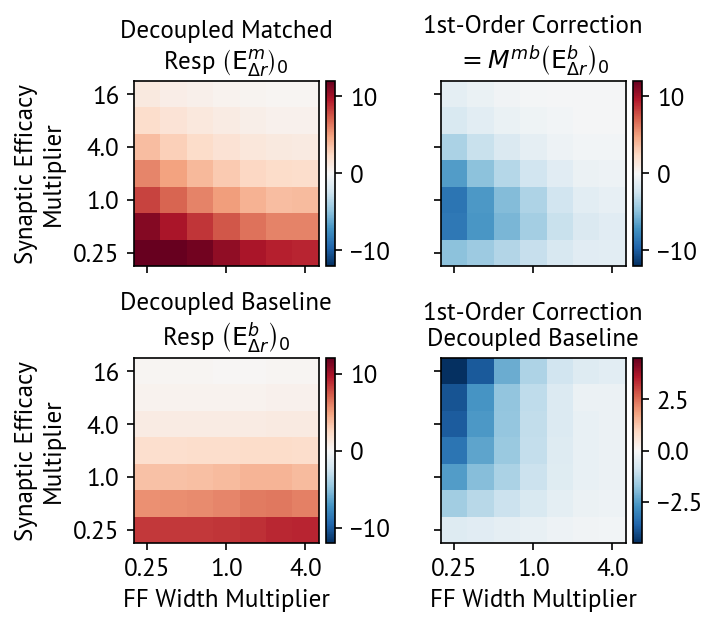

In [19]:
fig,axs = plt.subplots(2,2,figsize=(2.2*2,2.0*2),dpi=150,sharey="row",sharex="col")#,width_ratios=[3,3,4])
fig.subplots_adjust(wspace=0.5,hspace=0.5)

diff_dr0_lim = np.nanmax(np.abs(J_vsm_dr0[:,:].flatten()))
diff_dr1_lim = np.nanmax(np.abs(J_vsm_dr1[:,:].flatten()))
# norm_cov_lim = 0.32

cbar = imshowbar(fig,axs[0,0],J_vsm_dr0.T,origin="lower",cmap="RdBu_r",vmin=-12,vmax=12)
cbar.ax.tick_params(labelsize=12)
cbar = imshowbar(fig,axs[0,1],J_vsm_dr1.T,origin="lower",cmap="RdBu_r",vmin=-12,vmax=12)
cbar.ax.tick_params(labelsize=12)
cbar = imshowbar(fig,axs[1,0],J_osm_dr0.T,origin="lower",cmap="RdBu_r",vmin=-12,vmax=12)
cbar.ax.tick_params(labelsize=12)
cbar = imshowbar(fig,axs[1,1],(J_vsm_dr1/J_osm_dr0).T,origin="lower",cmap="RdBu_r",vmin=-4.5,vmax=4.5)
cbar.ax.tick_params(labelsize=12)

axs[0,0].set_ylabel("Synaptic Efficacy\nMultiplier",fontsize=12)
axs[1,0].set_ylabel("Synaptic Efficacy\nMultiplier",fontsize=12)

for i in range(2):
    axs[i,0].set_ylabel("Synaptic Efficacy\nMultiplier",fontsize=12)
    axs[i,0].set_yticks(np.arange(0,7,2),["0.25","1.0","4.0","16"],fontsize=12)
    axs[1,i].set_xticks(np.arange(0,7,3),["0.25","1.0","4.0"],fontsize=12)
    axs[1,i].set_xlabel("FF Width Multiplier",fontsize=12)

axs[0,0].set_title("Decoupled Matched\n"+r"Resp $\left(\mathrm{E}_{\Delta r}^m\right)_0$",fontsize=12)
axs[0,1].set_title("1st-Order Correction\n"+r"$=M^{mb} \left(\mathrm{E}_{\Delta r}^b\right)_0$",fontsize=12)
axs[1,0].set_title("Decoupled Baseline\n"+r"Resp $\left(\mathrm{E}_{\Delta r}^b\right)_0$",fontsize=12)
axs[1,1].set_title("1st-Order Correction\n"+"Decoupled Baseline",fontsize=12)

# fig.tight_layout()
fig.savefig("./fig_4c.pdf", bbox_inches="tight")